Nama : Rheco Paradhika Kusuma

Nim : 10118065

Institut Teknologi Bandung

# SELAMAT DATANG

---
Notebook ini berisikan Market Basket Analysis dari dataset online retail UK, yaitu Data transaksi sebuah perusahaan retail di Inggris pada tahun 2010-2011. 

Data dapat diakses dari situs https://archive.ics.uci.edu/ dengan judul Online Retail yang bersumber dari Dr Daqing Chen.

## Import Data

---

Langkah awal yang biasanya dilakukan

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori, association_rules

## Upload data

---

Data yang digunakan adalah online retail UK

Adapun isi dari tahap ini adalah :

- Upload data

- Melihat informasi tentang data

- Statistika deskriptif

In [ ]:
# Buat connect ke drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read data

data = pd.read_csv('/content/drive/My Drive/Project/data.csv', sep=",", encoding= 'unicode_escape')

In [ ]:
# Buat nyari tau info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Statistika deskriptif

data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Cleaning and Preprocessing data

---

Langkah wajib sebelum masuk ke bagian analisis

- Membuat kolom canceled, jika dicancel maka diberi angka 1

- Merubah tipe data Invoice menjadi sebuah datetime

- Membuat kolom total, yaitu Quantity * price

- Membuang data duplikasi

- Memeriksa apakah ada missing values dan membuang missing values pada CustomerID

- Stripping extra spaces in the description 

- Dropping the rows without any invoice number

- Membuat processed, yaitu data yang tidak dicancel

- Membuat kolom bulan pada processed

In [ ]:
# Membuat kolom canceled

data['new_col'] = data['InvoiceNo'].astype(str).str[0]
data.loc[data['new_col'] == 'C', 'canceled'] = '1'  
data.loc[data['new_col'] != 'C', 'canceled'] = '0'  
data.drop('new_col', inplace=True, axis=1)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


In [ ]:
data.info()

data['canceled']=data['canceled'].astype(int)

print("\n Sesudah")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   canceled     541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB

 Sesudah
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     5

In [ ]:
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])

In [ ]:
data["Total"]=data["Quantity"]*data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [ ]:
# Drop data duplikat

data.drop_duplicates(inplace=True)
data.shape

(536641, 10)

In [ ]:
# Apakah ada null values?

data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
canceled       False
Total          False
dtype: bool

In [ ]:
# Kita buang null CustomerID

data = data[data['CustomerID'].notna()]
data['CustomerID'] = data['CustomerID'].astype(int)
data['CustomerID'] = data['CustomerID'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
 8   canceled     401604 non-null  int64         
 9   Total        401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 33.7+ MB


In [ ]:
# Stripping extra spaces in the description 
data['Description'] = data['Description'].str.strip() 
  
# Dropping the rows without any invoice number 
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str') 

In [ ]:
# Pilih data yang tidak direturn / cancel
processed = data[(data['canceled'] == 0)]

# Pilih data yang dicancel
can = data[(data['canceled'] == 1)]

In [ ]:
# Buat kolom bulan
processed["month"]= processed['InvoiceDate'].dt.month
processed["dayofweek"] = processed['InvoiceDate'].dt.dayofweek
processed["day"] = processed['InvoiceDate'].dt.day
processed["month"] = processed['InvoiceDate'].dt.month
processed["year"] = processed['InvoiceDate'].dt.year
processed["time"] = processed['InvoiceDate'].dt.time
processed["hour"] = processed['InvoiceDate'].dt.hour

can["dayofweek"] = can['InvoiceDate'].dt.dayofweek
can["day"] = can['InvoiceDate'].dt.day
can["month"] = can['InvoiceDate'].dt.month
can["year"] = can['InvoiceDate'].dt.year
can["time"] = can['InvoiceDate'].dt.time
can["hour"] = can['InvoiceDate'].dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Preprop dataframe "data"


data["dayofweek"] = data['InvoiceDate'].dt.dayofweek
data["day"] = data['InvoiceDate'].dt.day
data["month"] = data['InvoiceDate'].dt.month
data["year"] = data['InvoiceDate'].dt.year
data["time"] = data['InvoiceDate'].dt.time
data["hour"] = data['InvoiceDate'].dt.hour

In [ ]:
processed.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Total,month,dayofweek,day,year,time,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,12,2,1,2010,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,12,2,1,2010,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,12,2,1,2010,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,12,2,1,2010,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,12,2,1,2010,08:26:00,8


In [ ]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
 8   canceled     392732 non-null  int64         
 9   Total        392732 non-null  float64       
 10  month        392732 non-null  int64         
 11  dayofweek    392732 non-null  int64         
 12  day          392732 non-null  int64         
 13  year         392732 non-null  int64         
 14  time         392732 non-null  object        
 15  hour         392732 non-null  int6

In [ ]:
disc = data[data["StockCode"]=="D"]

## EDA

---

Mencari insight

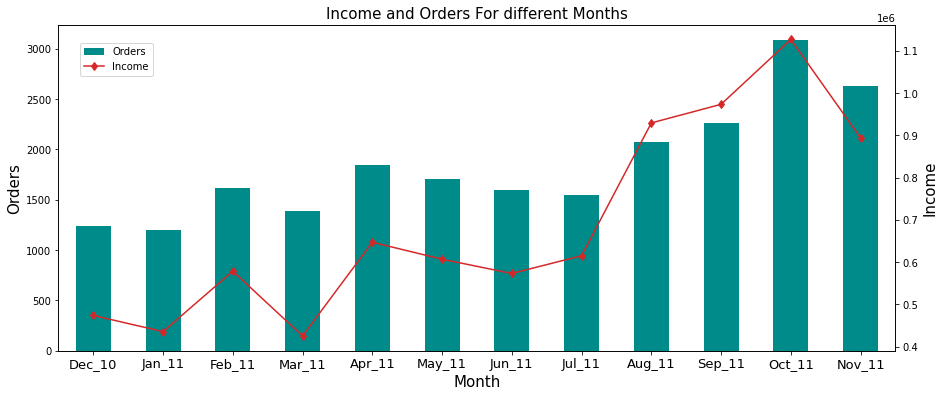

In [ ]:
ord_rev_month = pd.DataFrame({'Order': data.groupby('InvoiceNo')['month'].unique().value_counts().sort_index(), 
                              'Income' : data.groupby('month')['Total'].sum()})


fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_month['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = ord_rev_month['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Income',fontsize=15)
ax1.set_title('Income and Orders For different Months',fontsize=15)
ax1.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11',
                    'Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

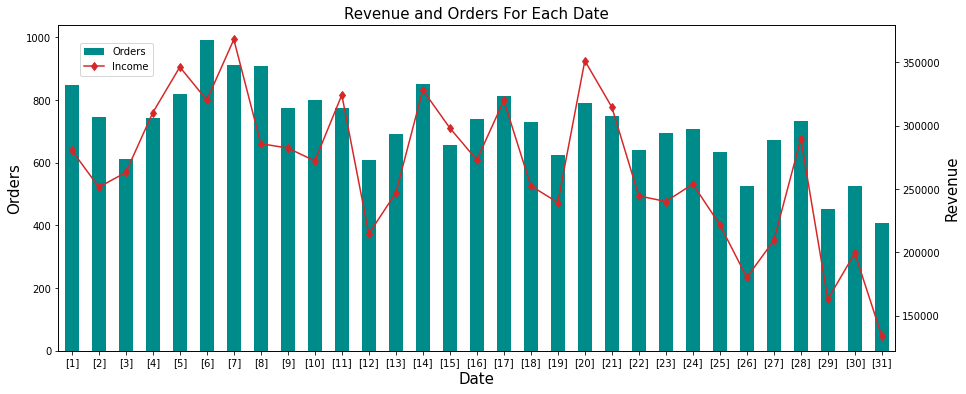

In [ ]:
ord_rev_date = pd.DataFrame({'Order': data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index(), 
                              'Income' : data.groupby('day')['Total'].sum()})


fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_date['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = ord_rev_date['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Date',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

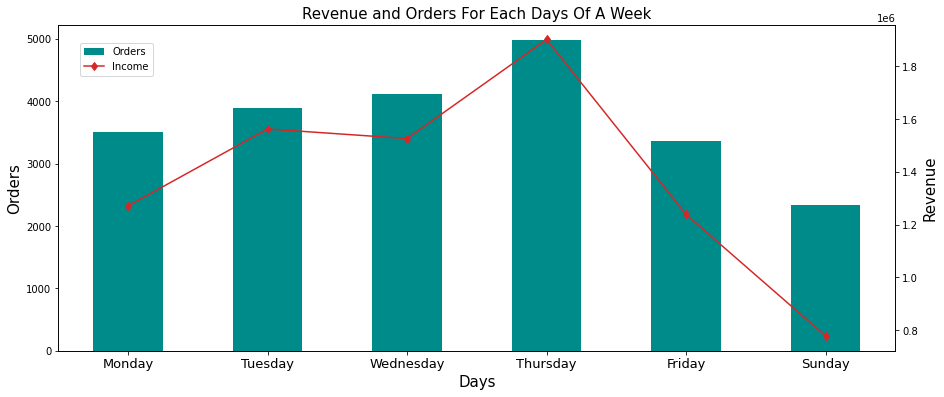

In [ ]:
ord_rev_day = pd.DataFrame({'Order': data.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index(), 
                              'Income' : data.groupby('dayofweek')['Total'].sum()})


fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_day['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = ord_rev_day['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Days',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Days Of A Week',fontsize=15)
ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Sunday'), 
                    rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

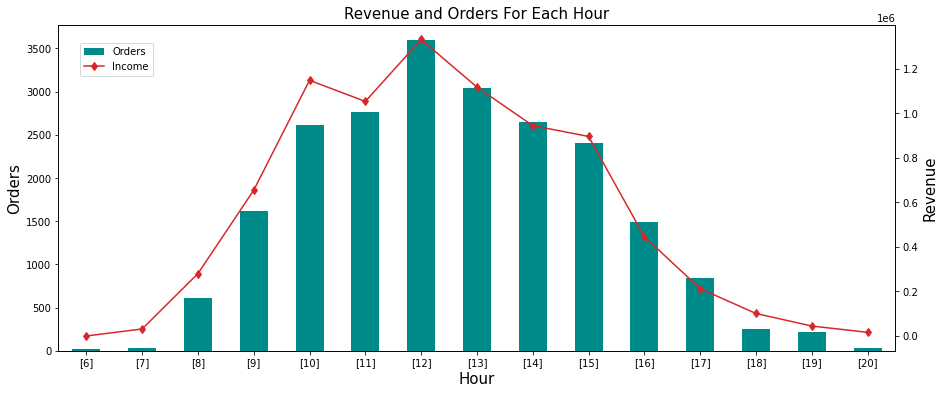

In [ ]:
ord_rev_hour = pd.DataFrame({'Order': data.groupby('InvoiceNo')['hour'].unique().value_counts()[:-1].sort_index(), 
                              'Income' : data.groupby('hour')['Total'].sum()})

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_hour['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = ord_rev_hour['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Hour',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Hour',fontsize=15)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

### Analisis transaksi diproses

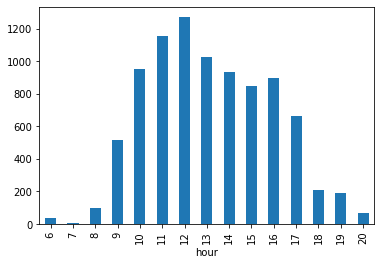

In [ ]:
can.groupby('hour').count()['InvoiceNo'].plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


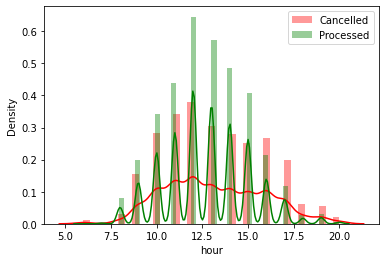

In [ ]:
ax= plt.subplot()
sns.distplot(data.loc[data["canceled"]==1, "hour"], ax=ax, color="red",label="Cancelled")
sns.distplot(data.loc[data["canceled"]==0, "hour"], ax=ax, color="green",label="Processed")
ax.legend()

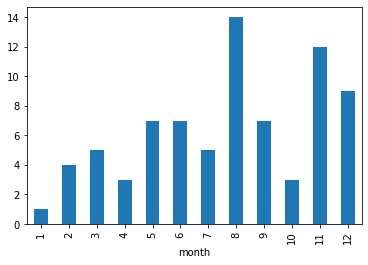

In [ ]:
disc.groupby('month').count()['InvoiceNo'].plot(kind='bar')

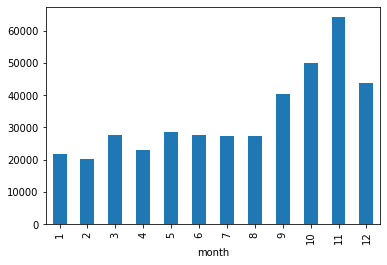

In [ ]:
data.groupby('month').count()['InvoiceNo'].plot(kind='bar')

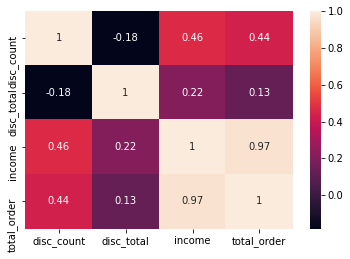

In [ ]:
de = pd.DataFrame(disc.groupby('month').count()['Total'])
de["disc_total"] = pd.DataFrame(disc.groupby('month').sum()['Total'])
de["income"] = pd.DataFrame(data.groupby('month').sum()['Total'])
de["total_order"] = pd.DataFrame(data.groupby('month').count()['InvoiceNo'])
de.columns = ['disc_count', 'disc_total', "income", "total_order"]

sns.heatmap(de.corr(), annot=True)

## Analisis Perkembangan tiap negara

---

Melakukan analisis untuk 3 negara yang menduduki 3 teratas pendapatan.

Isi dari tahap ini :

- Market basket analysis

Bagaimana pendapatan tiap negara ?

Text(0.5, 1.0, 'Income For Different Countries')

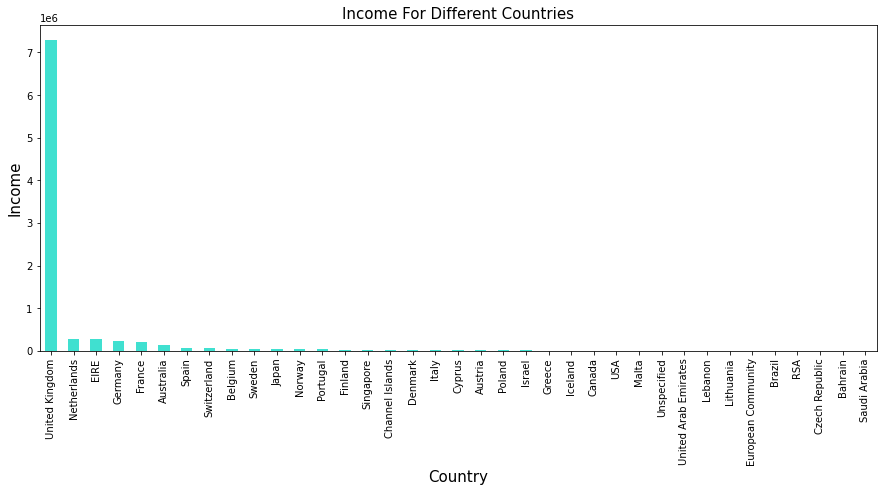

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

processed.groupby('Country').sum()['Total'].sort_values(ascending=False).plot(kind='bar', color='turquoise')

ax1.set_xlabel('Country',fontsize=15)
ax1.set_ylabel('Income',fontsize=15)
ax1.set_title('Income For Different Countries',fontsize=15)

Fungsi encoding

---

Untuk MBA

In [ ]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

Setelah melihat pendapatan tiap negara, maka dilanjutkan dengan analisis dari top 3 negara yang memiliki pendapatan terbesar.

### Country : UK

---

Melakukan analisis pada negara UK

Melihat Trend pada negara

In [ ]:
# Melihat trend pada negara UK

UK_rev_month = pd.DataFrame({'Order': processed[processed['Country'] =="United Kingdom"].groupby('InvoiceNo')['month'].unique().value_counts().sort_index(), 
                              'Income' : processed[processed['Country'] =="United Kingdom"].groupby('month')['Total'].sum()})
UK_rev_month

,Order,Income
[1],874,440876.330
[2],897,354618.200
[3],1177,465784.190
[4],1058,408733.111
[5],1403,550359.350
[6],1249,523775.590
[7],1200,484545.591
[8],1133,497194.910
[9],1569,794806.692
[10],1705,821220.130


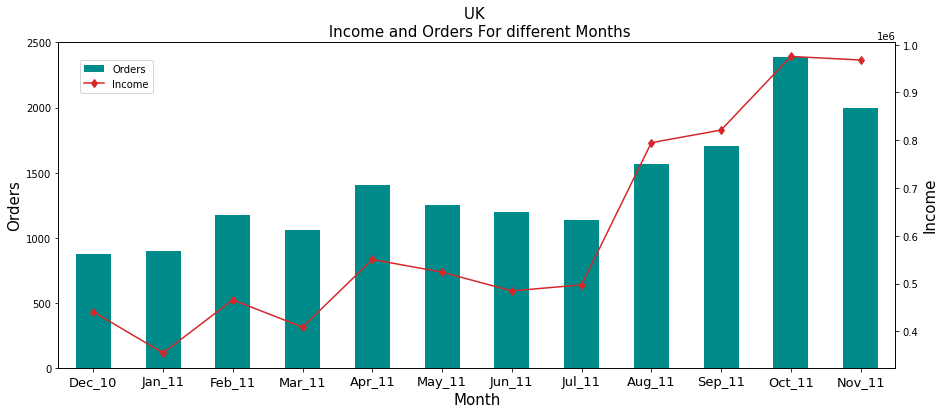

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = UK_rev_month['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = UK_rev_month['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Income',fontsize=15)
ax1.set_title('UK \n Income and Orders For different Months',fontsize=15)
ax1.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11',
                    'Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.savefig('Income UK.png')
plt.show()

Produk apa yang memiliki pendapatan terbesar?

In [ ]:
items_UK = (processed[processed['Country'] == "United Kingdom"] 
          .groupby(['Description'])['Total'] 
          .agg(["min", 
                "max", 
                "sum", 
                "count"]).reset_index().fillna(0)
          .sort_values('count', ascending = False))

In [ ]:
items_UK

,Description,min,max,sum,count
3655,WHITE HANGING HEART T-LIGHT HOLDER,2.95,4921.50,94805.50,1929
1736,JUMBO BAG RED RETROSPOT,1.95,1980.00,77191.33,1461
2729,REGENCY CAKESTAND 3 TIER,12.75,2978.40,110713.00,1417
204,ASSORTED COLOUR BIRD ORNAMENT,1.69,4176.00,52228.68,1320
2314,PARTY BUNTING,0.00,830.00,63050.28,1301
...,...,...,...,...,...
1391,GLASS BELL JAR LARGE,17.00,17.00,17.00,1
3502,VINTAGE BEAD PINK JEWEL BOX,4.25,4.25,4.25,1
2993,SET OF 4 KNICK KNACK TINS DOILEY,24.90,24.90,24.90,1
1994,MIDNIGHT BLUE VINTAGE EARRINGS,15.00,15.00,15.00,1


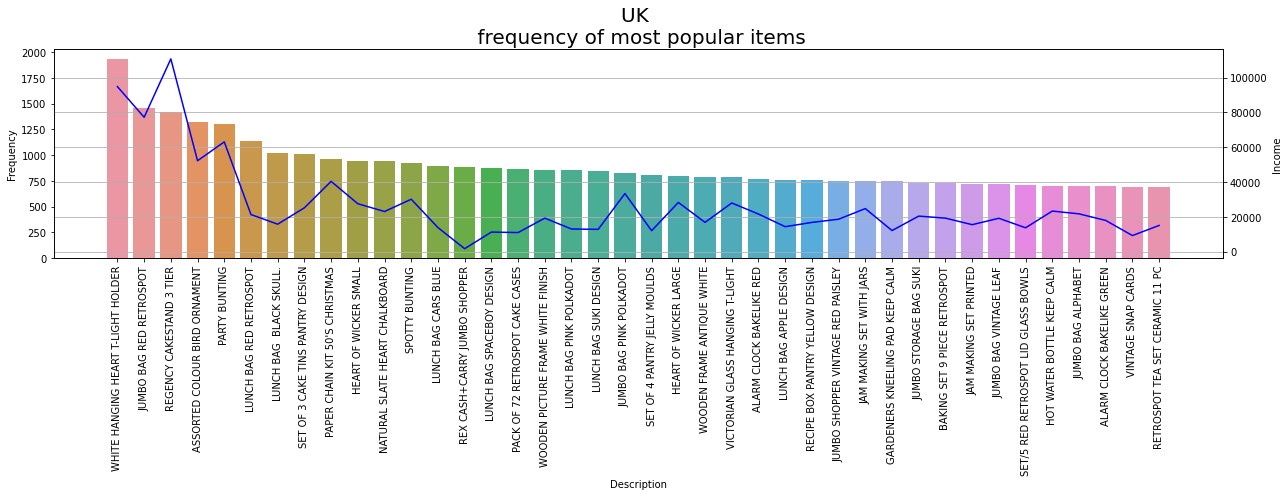

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 7))
 
ax1 = sns.barplot(x = 'Description', y = 'count', data = items_UK[['Description', 'count']].head(40))
 
ax2 = plt.twinx()
ax2 = sns.lineplot(x = 'Description', y = 'sum', ax=ax2, data = items_UK[['Description', 'sum']].head(40), color="b")
 
plt.title('UK \n frequency of most popular items', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(ylabel='Frequency')
ax2.set(ylabel='Income')
plt.grid()
plt.tight_layout()
plt.savefig('UK items.png')
plt.show()

Melakukan market basket analysis

In [ ]:
basket_UK = (processed[processed['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [ ]:
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded
basket_UK.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
basket_UK.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 ROSE MORRIS BOXED CANDLES,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
scrules = rules.sort_values(['support', 'confidence'], ascending =[False, False]) 

In [ ]:
scrules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
227,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.048772,0.086912,0.030392,0.623153,7.169917,0.026153,2.422965
226,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086912,0.048772,0.030392,0.349689,7.169917,0.026153,1.462728
353,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.059823,0.067271,0.029071,0.485944,7.223641,0.025046,1.814449
352,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.067271,0.059823,0.029071,0.432143,7.223641,0.025046,1.655657
114,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.036759,0.040723,0.028590,0.777778,19.099148,0.027093,4.316746


### Country : NETHERLANDS

---

Melakukan analisis pada negara Netherlands yang menduduki posisi 2

Melihat Trend pada negara Netherlands

In [ ]:
# Melihat trend pada negara Netherlands

N_rev_month = pd.DataFrame({'Order': processed[processed['Country'] =="Netherlands"].groupby('InvoiceNo')['month'].unique().value_counts().sort_index(), 
                              'Income' : processed[processed['Country'] =="Netherlands"].groupby('month')['Total'].sum()})
N_rev_month

,Order,Income
[1],5,26611.16
[2],5,23011.91
[3],8,22416.49
[4],3,2976.56
[5],11,29185.88
[6],11,26858.09
[7],1,26.02
[8],8,40327.81
[9],7,26937.26
[10],15,40708.65


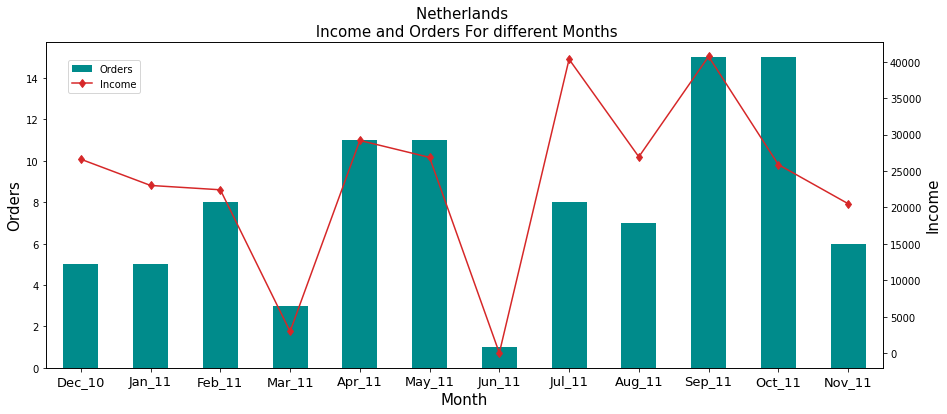

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = N_rev_month['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = N_rev_month['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Income',fontsize=15)
ax1.set_title('Netherlands \n Income and Orders For different Months',fontsize=15)
ax1.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11',
                    'Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.savefig('Income Netherlands.png')
plt.show()

Produk apa yang memiliki pendapatan terbesar?

In [ ]:
items_N = (processed[processed['Country'] == "Netherlands"] 
          .groupby(['Description'])['Total'] 
          .agg(["min", 
                "max", 
                "sum", 
                "count"]).reset_index().fillna(0)
          .sort_values('count', ascending = False))

In [ ]:
items_N = items_N[items_N.Description != "POSTAGE"]
items_N.head(10)

,Description,min,max,sum,count
708,SPACEBOY LUNCH BOX,23.40,1056.00,7485.60,28
591,ROUND SNACK BOXES SET OF4 WOODLAND,35.40,612.00,7991.40,25
173,DOLLY GIRL LUNCH BOX,23.40,1056.00,6828.60,22
589,ROUND SNACK BOXES SET OF 4 FRUITS,122.40,489.60,4039.20,17
704,SPACEBOY BIRTHDAY CARD,5.04,77.76,678.96,17
774,WOODLAND CHARLOTTE BAG,8.50,216.00,1664.50,16
559,RED TOADSTOOL LED NIGHT LIGHT,19.80,417.60,3479.40,14
718,STRAWBERRY LUNCH BOX WITH CUTLERY,2.55,378.00,2033.85,14
332,JUMBO BAG RED RETROSPOT,165.00,358.00,3468.00,14
443,PACK OF 72 RETROSPOT CAKE CASES,13.20,604.80,1740.00,13


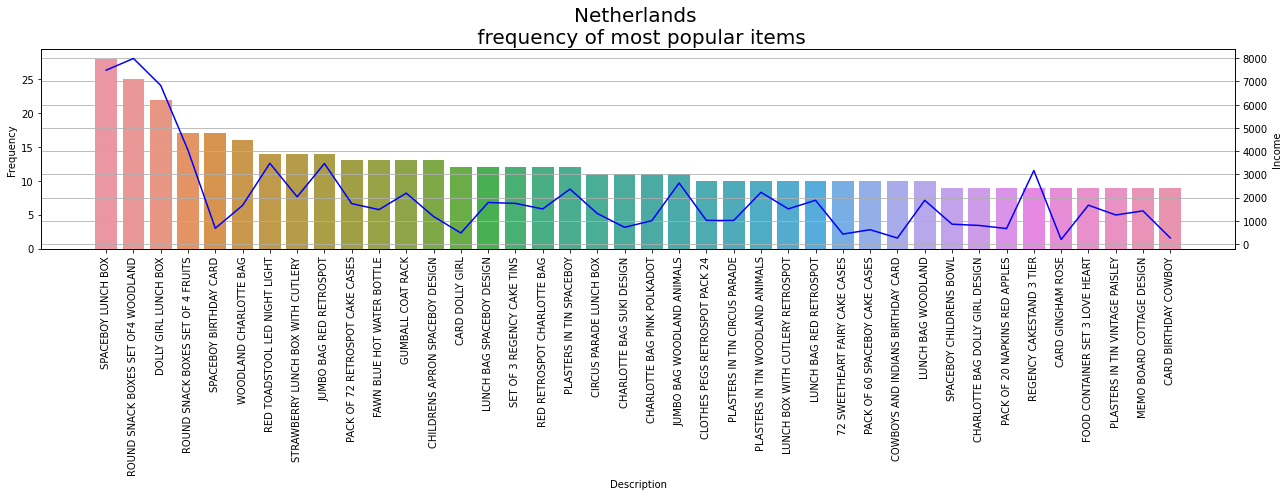

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 7))

ax1 = sns.barplot(x = 'Description', y = 'count', data = items_N[['Description', 'count']].head(40))

ax2 = plt.twinx()
ax2 = sns.lineplot(x = 'Description', y = 'sum', ax=ax2, data = items_N[['Description', 'sum']].head(40), color="b")

plt.title('Netherlands \n frequency of most popular items', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(ylabel='Frequency')
ax2.set(ylabel='Income')
plt.grid()
plt.tight_layout()
plt.savefig('Netherlands items.png')
plt.show()


Melakukan market basket analysis

In [ ]:
basket_N = (processed[processed['Country'] == "Netherlands"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [ ]:
basket_encoded = basket_N.applymap(hot_encode) 
basket_N = basket_encoded
basket_N.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
basket_N.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 STRIPEY MICE FELTCRAFT,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE WOODLAND,3D CHRISTMAS STAMPS STICKERS,3D HEARTS HONEYCOMB PAPER GARLAND,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ABC TREASURE BOOK BOX,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALUMINIUM STAMPED HEART,ANGEL DECORATION PAINTED ZINC,APOTHECARY MEASURING JAR,APRON APPLE DELIGHT,ASS FLORAL PRINT MULTI SCREWDRIVER,...,WHITE SPOT BLUE CERAMIC DRAWER KNOB,WHITE SPOT RED CERAMIC DRAWER KNOB,WHITE WOOD GARDEN PLANT LADDER,WOOD STAMP SET BEST WISHES,WOODEN ADVENT CALENDAR CREAM,WOODEN ADVENT CALENDAR RED,WOODEN CROQUET GARDEN SET,WOODEN OWLS LIGHT GARLAND,WOODEN SCHOOL COLOURING SET,WOODLAND HEIGHT CHART STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND MINI RUCKSACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WRAP VINTAGE DOILEY,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frq_items = apriori(basket_N, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
scrules = rules.sort_values(['support', 'confidence'], ascending =[False, False]) 

In [ ]:
scrules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
612,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.231579,0.294737,0.221053,0.954545,3.238636,0.152798,15.515789
613,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.294737,0.231579,0.221053,0.750000,3.238636,0.152798,3.073684
1298,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.263158,0.294737,0.189474,0.720000,2.442857,0.111911,2.518797
1299,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.294737,0.263158,0.189474,0.642857,2.442857,0.111911,2.063158
607,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.231579,0.263158,0.168421,0.727273,2.763636,0.107479,2.701754


### Country : EIRE / IRLANDIA

---

Melakukan analisis pada negara Irlandia yang menduduki posisi 3

Melihat Trend pada negara Irlandia

In [ ]:
# Melihat trend pada negara Irlandia

E_rev_month = pd.DataFrame({'Order': processed[processed['Country'] =="EIRE"].groupby('InvoiceNo')['month'].unique().value_counts().sort_index(), 
                              'Income' : processed[processed['Country'] =="EIRE"].groupby('month')['Total'].sum()})
E_rev_month

,Order,Income
[1],7,21904.19
[2],9,10111.52
[3],22,21674.36
[4],11,7570.50
[5],18,15977.15
[6],24,19835.99
[7],22,40854.15
[8],17,16957.83
[9],36,40832.64
[10],31,24302.92


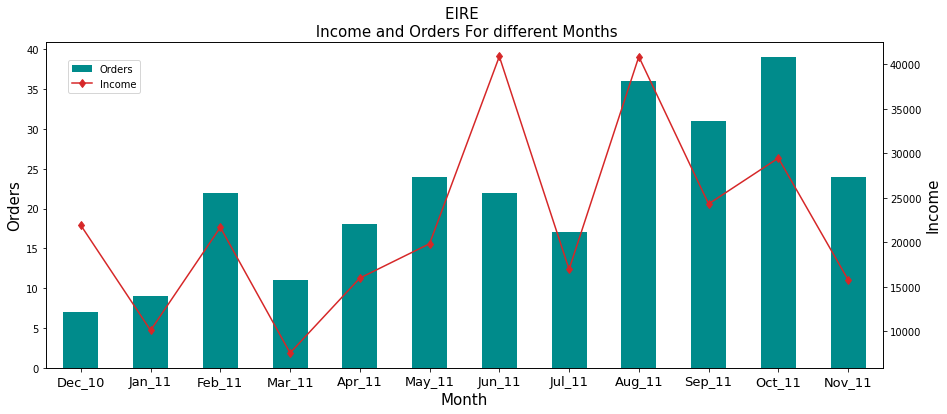

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = E_rev_month['Order'].plot(kind='bar', color='darkcyan', label='Orders')
ax2 = E_rev_month['Income'].plot(kind='line', color='tab:red', marker='d', secondary_y=True, label = 'Income')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Income',fontsize=15)
ax1.set_title('EIRE \n Income and Orders For different Months',fontsize=15)
ax1.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11',
                    'Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

Produk apa yang memiliki pendapatan terbesar?

In [ ]:
items_E = (processed[processed['Country'] == "EIRE"] 
          .groupby(['Description'])['Total'] 
          .agg(["min", 
                "max", 
                "sum", 
                "count"]).reset_index().fillna(0)
          .sort_values('count', ascending = False))

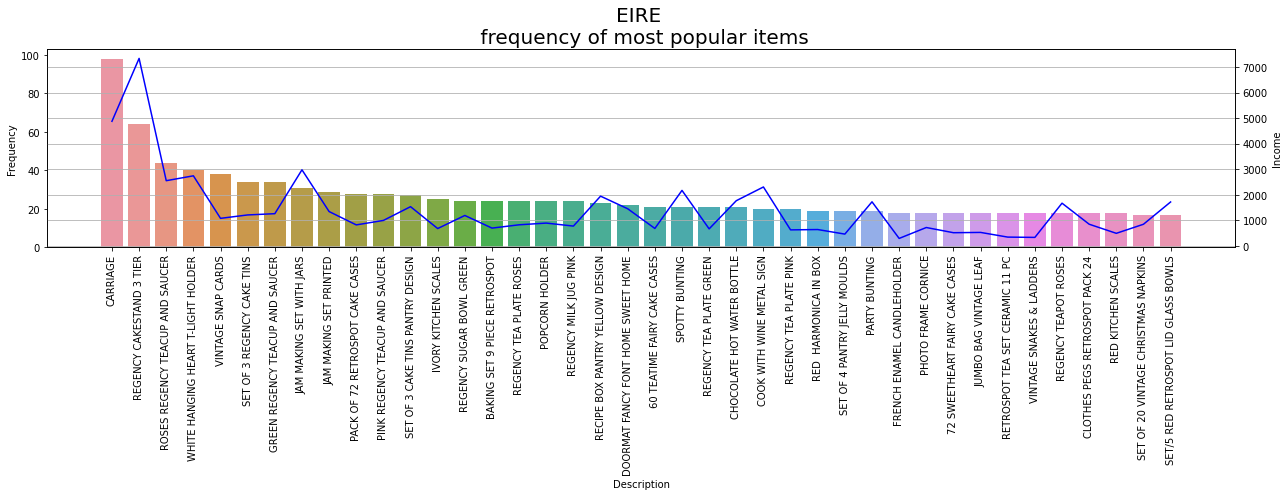

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 7))

ax1 = sns.barplot(x = 'Description', y = 'count', data = items_E[['Description', 'count']].head(40))

ax2 = plt.twinx()
ax2 = sns.lineplot(x = 'Description', y = 'sum', ax=ax2, data = items_E[['Description', 'sum']].head(40), color="b")

plt.title('EIRE \n frequency of most popular items', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set(ylabel='Frequency')
ax2.set(ylabel='Income')
plt.grid()
plt.tight_layout()
plt.savefig('EIRE items.png')
plt.show()

Melakukan market basket analysis

In [ ]:
basket_E = (processed[processed['Country'] == "EIRE"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [ ]:
basket_encoded = basket_E.applymap(hot_encode) 
basket_E = basket_encoded

In [ ]:
basket_E.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 RAFFIA RIBBONS VINTAGE CHRISTMAS,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,...,WRAP A PRETTY THANK YOU,WRAP ALPHABET DESIGN,WRAP ALPHABET POSTER,WRAP BAD HAIR DAY,WRAP BILLBOARD FONTS DESIGN,WRAP BIRD GARDEN,WRAP CHRISTMAS SCREEN PRINT,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP KEEP CALM BIRTHDAY,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN","WRAP, CAROUSEL",YELLOW COAT RACK PARIS FASHION,YELLOW EASTER EGG HUNT START POST,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
536541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536975,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frq_items = apriori(basket_E, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
scrules = rules.sort_values(['support', 'confidence'], ascending =[False, False]) 

In [ ]:
scrules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.130769,0.169231,0.119231,0.911765,5.387701,0.097101,9.415385
17,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.169231,0.130769,0.119231,0.704545,5.387701,0.097101,2.942012
53,(ROSES REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.169231,0.242308,0.111538,0.659091,2.720058,0.070533,2.222564
52,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER),0.242308,0.169231,0.111538,0.460317,2.720058,0.070533,1.539367
39,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.107692,0.169231,0.103846,0.964286,5.698052,0.085621,23.261538


## Recommendation

Rekomendasi yang dapat diberikan ialah

- Membuat paketan

- Meletakkan item2 yang punya lift tinggi agar berdekatan